In [34]:
# !pip install torch
!pip install tensorflow

In [35]:
# !pip install transformers

In [36]:
# !pip install openpyxl


In [37]:
#!pip install xgboost

# EDA and Feature engineering for prebrth

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [39]:
print(sklearn.__version__)

1.6.1


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
file="/content/drive/MyDrive/Mathru/August 2019.xlsx"
df=pd.read_excel(file)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Columns: 137 entries, hos to n2dofd
dtypes: datetime64[ns](3), float64(71), int64(50), object(13)
memory usage: 367.2+ KB
None


In [42]:
print(df.describe())

         hos  hosoth                            adm  \
count  343.0     0.0                            343   
mean     1.0     NaN  2019-08-14 12:48:16.793003008   
min      1.0     NaN            2019-06-21 00:00:00   
25%      1.0     NaN            2019-08-07 00:00:00   
50%      1.0     NaN            2019-08-15 00:00:00   
75%      1.0     NaN            2019-08-22 12:00:00   
max      1.0     NaN            2019-08-31 00:00:00   
std      0.0     NaN                            NaN   

                               deliv                           disc  \
count                            343                            343   
mean   2019-08-16 13:34:27.638483968  2019-08-20 03:04:43.381924096   
min              2019-08-01 00:00:00            2019-08-02 00:00:00   
25%              2019-08-09 00:00:00            2019-08-12 00:00:00   
50%              2019-08-17 00:00:00            2019-08-21 00:00:00   
75%              2019-08-24 00:00:00            2019-08-28 00:00:00   
max    

In [43]:
# Convert to a dictionary
columns_datatypes = dict(df.dtypes)

# Print the columns and their datatypes
for column, dtype in columns_datatypes.items():
    print(f"Column: {column}, DataType: {dtype}")


Column: hos, DataType: int64
Column: hosoth, DataType: float64
Column: adm, DataType: datetime64[ns]
Column: deliv, DataType: datetime64[ns]
Column: disc, DataType: datetime64[ns]
Column: bht, DataType: int64
Column: field1, DataType: int64
Column: age, DataType: int64
Column: edu, DataType: int64
Column: wrk, DataType: int64
Column: mrt, DataType: int64
Column: gawks, DataType: int64
Column: days, DataType: int64
Column: gaus, DataType: int64
Column: grav, DataType: int64
Column: para, DataType: int64
Column: brna, DataType: int64
Column: bmi, DataType: int64
Column: mul, DataType: int64
Column: prehyp, DataType: int64
Column: ges, DataType: int64
Column: prensev, DataType: int64
Column: presev, DataType: int64
Column: ecl, DataType: int64
Column: chor, DataType: int64
Column: fet, DataType: int64
Column: iug, DataType: int64
Column: prediab, DataType: int64
Column: gdm, DataType: int64
Column: gdmd, DataType: int64
Column: mac, DataType: int64
Column: mahyp, DataType: int64
Column: p

In [44]:
print(df.gawks,df.days)

0      39
1      38
2      36
3      37
4      38
       ..
338    39
339    38
340    39
341    39
342    39
Name: gawks, Length: 343, dtype: int64 0      5
1      4
2      4
3      0
4      6
      ..
338    0
339    0
340    5
341    2
342    4
Name: days, Length: 343, dtype: int64


In [45]:
# Combine weeks and days into total_days (1 week = 7 days)
df['ga_tot'] = df['gawks'] * 7 + df['days']

In [46]:
# Drop the original weeks and days columns
df = df.drop(columns=['gawks', 'days'])

# Display the updated DataFrame
print(df)

     hos  hosoth        adm      deliv       disc  bht  field1  age  edu  wrk  \
0      1     NaN 2019-06-21 2019-08-05 2019-08-08   19   10870   38    3    3   
1      1     NaN 2019-07-03 2019-08-06 2019-08-10   19   11645   30    3    3   
2      1     NaN 2019-07-12 2019-08-15 2019-08-24   19   12249   38    4    2   
3      1     NaN 2019-07-20 2019-08-02 2019-08-06   19   12744   35    3    3   
4      1     NaN 2019-07-26 2019-08-09 2019-08-16   19   13088   34    3    3   
..   ...     ...        ...        ...        ...  ...     ...  ...  ...  ...   
338    1     NaN 2019-08-30 2019-08-31 2019-09-05   19   15459   33    3    3   
339    1     NaN 2019-08-30 2019-08-31 2019-09-22   19   15464   42    3    3   
340    1     NaN 2019-08-31 2019-08-31 2019-09-01   19   15486   27    3    3   
341    1     NaN 2019-08-31 2019-08-31 2019-09-03   19   15492   36    3    3   
342    1     NaN 2019-08-31 2019-08-31 2019-09-03   19   15496   18    3    3   

     ...  n2tra  n2mal  n2n

In [47]:
print(df.ga_tot)

0      278
1      270
2      256
3      259
4      272
      ... 
338    273
339    266
340    278
341    275
342    277
Name: ga_tot, Length: 343, dtype: int64


In [48]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"{column}: {null_count} null values")

hos: 0 null values
hosoth: 343 null values
adm: 0 null values
deliv: 0 null values
disc: 0 null values
bht: 0 null values
field1: 0 null values
age: 0 null values
edu: 0 null values
wrk: 0 null values
mrt: 0 null values
gaus: 0 null values
grav: 0 null values
para: 0 null values
brna: 0 null values
bmi: 0 null values
mul: 0 null values
prehyp: 0 null values
ges: 0 null values
prensev: 0 null values
presev: 0 null values
ecl: 0 null values
chor: 0 null values
fet: 0 null values
iug: 0 null values
prediab: 0 null values
gdm: 0 null values
gdmd: 0 null values
mac: 0 null values
mahyp: 0 null values
polig: 0 null values
olig: 0 null values
aph: 0 null values
sevan: 0 null values
roth: 0 null values
rfmat: 27 null values
rfetl: 313 null values
rfoth: 216 null values
ster: 0 null values
inster: 0 null values
precs: 0 null values
nrprecs: 0 null values
trlab: 0 null values
prebrth: 0 null values
setlab: 0 null values
modelv: 0 null values
typcs: 0 null values
antb: 0 null values
ifant: 0 null

In [49]:
# # Remove columns with more than 30 null values
# df = df.loc[:, df.isnull().sum() <= 30]

# # Print the remaining columns
# print(df.columns)

In [50]:
# Automatically count the number of rows in the DataFrame
total_rows = len(df)

# Calculate the threshold for missing values (10% of the rows)
threshold = 0.1 * total_rows

# Drop columns with more than the threshold of missing values
df = df.dropna(thresh=total_rows - threshold, axis=1)

# Print the remaining DataFrame
print(df)


     hos        adm      deliv       disc  bht  field1  age  edu  wrk  mrt  \
0      1 2019-06-21 2019-08-05 2019-08-08   19   10870   38    3    3    1   
1      1 2019-07-03 2019-08-06 2019-08-10   19   11645   30    3    3    1   
2      1 2019-07-12 2019-08-15 2019-08-24   19   12249   38    4    2    1   
3      1 2019-07-20 2019-08-02 2019-08-06   19   12744   35    3    3    1   
4      1 2019-07-26 2019-08-09 2019-08-16   19   13088   34    3    3    1   
..   ...        ...        ...        ...  ...     ...  ...  ...  ...  ...   
338    1 2019-08-30 2019-08-31 2019-09-05   19   15459   33    3    3    1   
339    1 2019-08-30 2019-08-31 2019-09-22   19   15464   42    3    3    1   
340    1 2019-08-31 2019-08-31 2019-09-01   19   15486   27    3    3    1   
341    1 2019-08-31 2019-08-31 2019-09-03   19   15492   36    3    3    1   
342    1 2019-08-31 2019-08-31 2019-09-03   19   15496   18    3    3    1   

     ...  n1jau  n1sep  n1inf  n1tra  n1mal  n1neu  n1photo  n1

In [51]:
# #Dropping date columns also adm,deliv,dis
# df = df.drop(columns=['adm', 'deliv', 'disc'])

In [52]:
# Convert to datetime
df['admission_date'] = pd.to_datetime(df['adm'], format='%d/%m/%Y')
df['delivery_date'] = pd.to_datetime(df['deliv'], format='%d/%m/%Y')
df['discharge_date'] = pd.to_datetime(df['disc'], format='%d/%m/%Y')

In [53]:
# Calculate durations
df['duration_of_stay'] = (df['discharge_date'] - df['admission_date']).dt.days
df['length_of_labor'] = (df['delivery_date'] - df['admission_date']).dt.days
df['post_delivery_stay'] = (df['discharge_date'] - df['delivery_date']).dt.days

print(df['duration_of_stay'],df['length_of_labor'], df['post_delivery_stay'])

0      48
1      38
2      43
3      17
4      21
       ..
338     6
339    23
340     1
341     3
342     3
Name: duration_of_stay, Length: 343, dtype: int64 0      45
1      34
2      34
3      13
4      14
       ..
338     1
339     1
340     0
341     0
342     0
Name: length_of_labor, Length: 343, dtype: int64 0       3
1       4
2       9
3       4
4       7
       ..
338     5
339    22
340     1
341     3
342     3
Name: post_delivery_stay, Length: 343, dtype: int64


In [54]:
df = df.drop(columns=['adm', 'deliv', 'disc','admission_date', 'delivery_date','discharge_date' ])

In [55]:
print(df.columns)

Index(['hos', 'bht', 'field1', 'age', 'edu', 'wrk', 'mrt', 'gaus', 'grav',
       'para', 'brna', 'bmi', 'mul', 'prehyp', 'ges', 'prensev', 'presev',
       'ecl', 'chor', 'fet', 'iug', 'prediab', 'gdm', 'gdmd', 'mac', 'mahyp',
       'polig', 'olig', 'aph', 'sevan', 'roth', 'rfmat', 'ster', 'inster',
       'precs', 'nrprecs', 'trlab', 'prebrth', 'setlab', 'modelv', 'typcs',
       'antb', 'ifant', 'inlab', 'modind', 'opdel', 'epi', 'anean', 'ifanea',
       'stgman', 'plarem', 'deloper', 'pertrs', 'pph', 'bldtr', 'bldunt',
       'crdpro', 'abrpl', 'utrpt', 'amnfle', 'adicu', 'mjrordy', 'otafde',
       'hyste', 'seps', 'dvt', 'complot', 'fnl', 'nrms', 'ptdest', 'n1brn',
       'n1stl', 'n1sex', 'n1btwg', 'n1apg1', 'n1apg5', 'n1apg10', 'n1vent',
       'n1aspx', 'n1pstdel', 'n1rds', 'n1jau', 'n1sep', 'n1inf', 'n1tra',
       'n1mal', 'n1neu', 'n1photo', 'n1othr', 'n1find', 'ga_tot',
       'duration_of_stay', 'length_of_labor', 'post_delivery_stay'],
      dtype='object')


In [56]:
df.to_excel('output_file.xlsx', index=False)

In [57]:
df.describe()

,hos,bht,field1,age,edu,wrk,mrt,gaus,grav,para,...,n1tra,n1mal,n1neu,n1photo,n1othr,n1find,ga_tot,duration_of_stay,length_of_labor,post_delivery_stay
count,343.0,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.0,343.000000,343.000000,...,342.0,342.000000,342.0,342.000000,342.000000,342.000000,343.000000,343.000000,343.000000,343.000000
mean,1.0,18.988338,14375.597668,28.626822,3.172012,2.830904,1.005831,2.0,2.064140,0.883382,...,1.0,1.002924,1.0,1.002924,1.181287,1.122807,271.827988,5.594752,2.032070,3.562682
std,0.0,0.215980,666.057613,5.754285,0.377942,0.383095,0.076249,0.0,1.175516,1.004864,...,0.0,0.054074,0.0,0.054074,0.385820,0.595295,14.278439,5.668903,4.014829,3.485308
min,1.0,15.000000,10870.000000,16.000000,3.000000,1.000000,1.000000,2.0,0.000000,0.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,178.000000,1.000000,0.000000,1.000000
25%,1.0,19.000000,13901.000000,25.000000,3.000000,3.000000,1.000000,2.0,1.000000,0.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,266.000000,3.000000,0.000000,2.000000
50%,1.0,19.000000,14373.000000,28.000000,3.000000,3.000000,1.000000,2.0,2.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,275.000000,4.000000,1.000000,2.000000
75%,1.0,19.000000,14903.000000,33.000000,3.000000,3.000000,1.000000,2.0,3.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,281.000000,6.000000,2.000000,4.000000
max,1.0,19.000000,15496.000000,46.000000,4.000000,3.000000,2.000000,2.0,7.000000,4.000000,...,1.0,2.000000,1.0,2.000000,2.000000,5.000000,297.000000,48.000000,45.000000,24.000000


In [58]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("abhinand/MedEmbed-large-v0.1")

sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium."
]
embeddings = model.encode(sentences)

similarities = model.similarity(embeddings, embeddings)
print(similarities.shape)
# [3, 3]

torch.Size([3, 3])


In [59]:
# import pandas as pd
# import numpy as np
# import torch
# from transformers import AutoTokenizer, AutoModel
# from sklearn.decomposition import PCA

# # Load your dataset
# columns_wt_str_ = [ 'rfmat','rfetl', 'rfoth', 'inlabot', 'modoth', 'opmatot', 'nrmsot', 'nrmsnot', 'n1add', 'n2add']

# # Filter the list to include only the columns that are present in the DataFrame
# columns_to_process = [col for col in columns_wt_str_ if col in df.columns]
# # df = pd.DataFrame(data)  # Ensure your DataFrame is loaded here

# # Load BioBERT model and tokenizer
# model_name = 'emilyalsentzer/Bio_ClinicalBERT'
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name)


# # Function to get embeddings and reduce to a single numeric value using PCA
# def get_single_numeric_value(texts, n_components=1):
#     # Tokenize the input texts
#     inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)

#     # Forward pass through the BioBERT model
#     with torch.no_grad():
#         outputs = model(**inputs)

#     # The last hidden state is the output embeddings
#     embeddings = outputs.last_hidden_state


#     # Extract the [CLS] token embeddings (the first token in each sequence)
#     cls_embeddings = embeddings[:, 0, :].detach().numpy()  # Shape: [batch_size, embedding_dim]

#     # Optionally, standardize the embeddings
#     from sklearn.preprocessing import StandardScaler
#     scaler = StandardScaler()
#     cls_embeddings_standardized = scaler.fit_transform(cls_embeddings)

#     # Apply PCA to reduce to a single dimension
#     pca = PCA(n_components=n_components)  # Reduce to `n_components` dimensions
#     reduced_embeddings = pca.fit_transform(cls_embeddings_standardized)

#     # Return the single numeric value per input text
#     # If n_components=1, the shape will be [batch_size, 1], so we take the first (and only) column
#     return reduced_embeddings[:, 0]

# # # Function to get embeddings and reduce to a single numeric value
# # def get_single_numeric_value(texts):
# #     # Tokenize the input texts
# #     inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)

# #     # Forward pass through BioBERT model
# #     with torch.no_grad():
# #         outputs = model(**inputs)

# #     # The last hidden state is the output embeddings
# #     embeddings = outputs.last_hidden_state

# #     # Extract the [CLS] token embeddings (the first token in each sequence)
# #     cls_embeddings = embeddings[:, 0, :].numpy()

# #     # Reduce the vector to a single numeric value, e.g., by taking the mean
# #     numeric_values = np.mean(cls_embeddings, axis=1)

# #     # Optionally, you can apply a normalization or further reduction technique
# #     return numeric_values

# # Loop over each column and apply the embedding extraction
# for col in columns_to_process:
#     df[col] = df[col].fillna('UNKNOWN')  # Replace NaNs in rfmat with 'Unknown'
#     # Ensure the column contains a list of strings, convert to list if necessary
#     text_data = df[col].astype(str).tolist()

#     # Apply the function to the selected column
#     numeric_values = get_single_numeric_value(text_data)

#     # Replace the original column with the single numeric value
#     df[col] = numeric_values

#     # Optionally, display the shape of numeric values for each column
#     print(f"Numeric Values for column {col} shape:", numeric_values.shape)

# # Display the updated DataFrame with the replaced numeric values
# print(df)


In [60]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA

# Load your dataset
columns_wt_str_ = [ 'rfmat','rfetl', 'rfoth', 'inlabot', 'modoth', 'opmatot', 'nrmsot', 'nrmsnot', 'n1add', 'n2add']

# Filter the list to include only the columns that are present in the DataFrame
columns_to_process = [col for col in columns_wt_str_ if col in df.columns]
# df = pd.DataFrame(data)  # Ensure your DataFrame is loaded here

# Load MedEmbed model and tokenizer
model_name = 'abhinand/MedEmbed-base-v0.1'  # Use the desired MedEmbed variant
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to get embeddings and reduce to a single numeric value using PCA
def get_single_numeric_value(texts, n_components=1):
    # Tokenize the input texts
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)

    # Forward pass through the MedEmbed model
    with torch.no_grad():
        outputs = model(**inputs)

    # The last hidden state is the output embeddings
    embeddings = outputs.last_hidden_state

    # Extract the [CLS] token embeddings (the first token in each sequence)
    cls_embeddings = embeddings[:, 0, :].detach().numpy()  # Shape: [batch_size, embedding_dim]

    # Optionally, standardize the embeddings
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    cls_embeddings_standardized = scaler.fit_transform(cls_embeddings)

    # Apply PCA to reduce to a single dimension
    pca = PCA(n_components=n_components)  # Reduce to `n_components` dimensions
    reduced_embeddings = pca.fit_transform(cls_embeddings_standardized)

    # Return the single numeric value per input text
    # If n_components=1, the shape will be [batch_size, 1], so we take the first (and only) column
    return reduced_embeddings[:, 0]

# Loop over each column and apply the embedding extraction
for col in columns_to_process:
    df[col] = df[col].fillna('UNKNOWN')  # Replace NaNs with 'Unknown'
    # Ensure the column contains a list of strings, convert to list if necessary
    text_data = df[col].astype(str).tolist()

    # Apply the function to the selected column
    numeric_values = get_single_numeric_value(text_data)

    # Replace the original column with the single numeric value
    df[col] = numeric_values

    # Optionally, display the shape of numeric values for each column
    print(f"Numeric Values for column {col} shape:", numeric_values.shape)

# Display the updated DataFrame with the replaced numeric values
print(df)


Numeric Values for column rfmat shape: (343,)
     hos  bht  field1  age  edu  wrk  mrt  gaus  grav  para  ...  n1tra  \
0      1   19   10870   38    3    3    1     2     4     3  ...    1.0   
1      1   19   11645   30    3    3    1     2     1     0  ...    1.0   
2      1   19   12249   38    4    2    1     2     2     1  ...    1.0   
3      1   19   12744   35    3    3    1     2     4     2  ...    1.0   
4      1   19   13088   34    3    3    1     2     1     0  ...    1.0   
..   ...  ...     ...  ...  ...  ...  ...   ...   ...   ...  ...    ...   
338    1   19   15459   33    3    3    1     2     1     0  ...    1.0   
339    1   19   15464   42    3    3    1     2     4     1  ...    1.0   
340    1   19   15486   27    3    3    1     2     3     1  ...    1.0   
341    1   19   15492   36    3    3    1     2     4     2  ...    1.0   
342    1   19   15496   18    3    3    1     2     1     0  ...    1.0   

     n1mal  n1neu  n1photo  n1othr  n1find  ga_tot  d

In [61]:
print(df['rfmat'])

0       7.624310
1       7.874936
2      -0.433212
3       0.046365
4       9.321030
         ...    
338    -9.618175
339     0.598457
340     9.250458
341     2.884771
342   -16.969213
Name: rfmat, Length: 343, dtype: float32


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 94 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hos                 343 non-null    int64  
 1   bht                 343 non-null    int64  
 2   field1              343 non-null    int64  
 3   age                 343 non-null    int64  
 4   edu                 343 non-null    int64  
 5   wrk                 343 non-null    int64  
 6   mrt                 343 non-null    int64  
 7   gaus                343 non-null    int64  
 8   grav                343 non-null    int64  
 9   para                343 non-null    int64  
 10  brna                343 non-null    int64  
 11  bmi                 343 non-null    int64  
 12  mul                 343 non-null    int64  
 13  prehyp              343 non-null    int64  
 14  ges                 343 non-null    int64  
 15  prensev             343 non-null    int64  
 16  presev  

In [63]:
df_cleaned=df.drop(columns=['ster','inster','trlab','inlab','ga_tot','hos','brna','modelv','epi','ifanea','plarem','pertrs','bldtr','setlab','typcs','anean','stgman','deloper','pph','crdpro','field1',
                            'utrpt','adicu','otafde','n1brn','n1sex','n1apg1','n1apg10','n1aspx','n1rds','n1sep','n1tra','n1neu','n1othr','n1find','modind',
                            'abrpl','mjrordy','dvt','n1stl','n1btwg','n1apg5','n1vent','n1pstdel','n1jau','n1inf','n1mal','n1photo','antb','opdel','ifant','post_delivery_stay','duration_of_stay'])

Dataset preview:
     hos  bht  field1  age  edu  wrk  mrt  gaus  grav  para  ...  n1tra  \
0      1   19   10870   38    3    3    1     2     4     3  ...    1.0   
1      1   19   11645   30    3    3    1     2     1     0  ...    1.0   
2      1   19   12249   38    4    2    1     2     2     1  ...    1.0   
3      1   19   12744   35    3    3    1     2     4     2  ...    1.0   
4      1   19   13088   34    3    3    1     2     1     0  ...    1.0   
..   ...  ...     ...  ...  ...  ...  ...   ...   ...   ...  ...    ...   
338    1   19   15459   33    3    3    1     2     1     0  ...    1.0   
339    1   19   15464   42    3    3    1     2     4     1  ...    1.0   
340    1   19   15486   27    3    3    1     2     3     1  ...    1.0   
341    1   19   15492   36    3    3    1     2     4     2  ...    1.0   
342    1   19   15496   18    3    3    1     2     1     0  ...    1.0   

     n1mal  n1neu  n1photo  n1othr  n1find  ga_tot  duration_of_stay  \
0      1.0

<ipython-input-64-5ed75d219ef5>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned_2['age'].fillna(df_cleaned_2['age'].mean(), inplace=True)
<ipython-input-64-5ed75d219ef5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

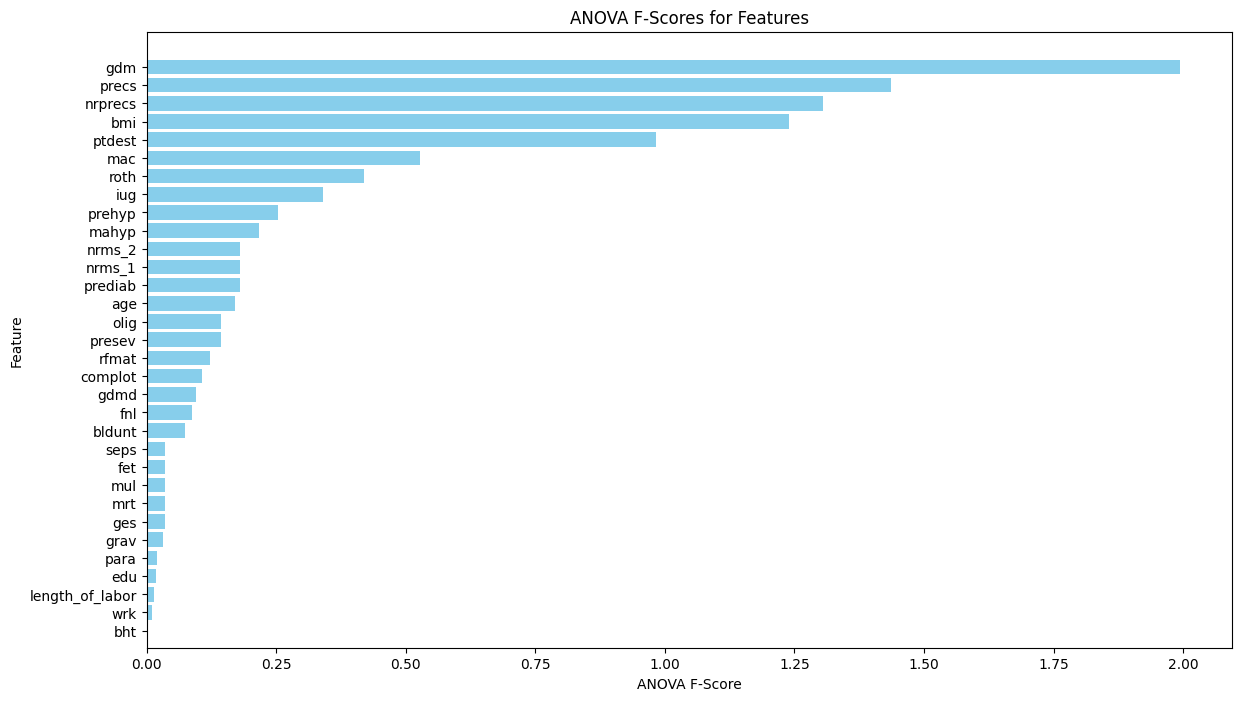

In [64]:
# Preview the dataset
print("Dataset preview:")
print(df)

# Create a copy to avoid SettingWithCopyWarning
df_cleaned_2 = df_cleaned.copy()

# Fill missing values in each specified column with the column mean
df_cleaned_2['age'].fillna(df_cleaned_2['age'].mean(), inplace=True)
df_cleaned_2['bmi'].fillna(df_cleaned_2['bmi'].mean(), inplace=True)
# df_cleaned_2['n1btwg'].fillna(df_cleaned_2['n1btwg'].mean(), inplace=True)

# # Drop rows with missing values in object-type columns
# df_cleaned_2 = df_cleaned_2.dropna(subset=df_cleaned_2.select_dtypes(include=['object']).columns)

# # Encode categorical features (One-Hot Encoding)
df_encoded = pd.get_dummies(df_cleaned_2, drop_first=False)
# df_encoded=df_cleaned_2

# Split dataset into features and target variable
X = df_encoded.drop(columns=['prebrth'])  # Replace 'prebrth' with your target variable column
y = df_encoded['prebrth']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ANOVA F-test
anova_selector = SelectKBest(f_classif, k='all')
X_train_anova = anova_selector.fit_transform(X_train_scaled, y_train)
anova_scores = anova_selector.scores_

# Create a DataFrame for ANOVA scores
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F-Score': anova_scores
})

# Sort features by ANOVA F-Score
anova_df = anova_df.sort_values(by='ANOVA F-Score', ascending=False)

# Select the top 20 features
top_60_features = anova_df.head(60)

# Display top 20 features
print("\nTop 20 Most Contributing Features for prebrth Prediction:")
print(top_60_features)

# Plot ANOVA F-scores for all features
plt.figure(figsize=(14, 8))
plt.barh(anova_df['Feature'], anova_df['ANOVA F-Score'], color='skyblue')
plt.xlabel('ANOVA F-Score')
plt.ylabel('Feature')
plt.title('ANOVA F-Scores for Features')
plt.gca().invert_yaxis()
plt.show()
#['age', 'edu', 'wrk', 'mrt', 'grav', 'prehyp', 'bmi', 'rfmat']

In [65]:
print(y_train)

261    1
97     1
181    1
68     1
23     1
      ..
188    1
71     1
106    1
270    1
102    1
Name: prebrth, Length: 205, dtype: int64


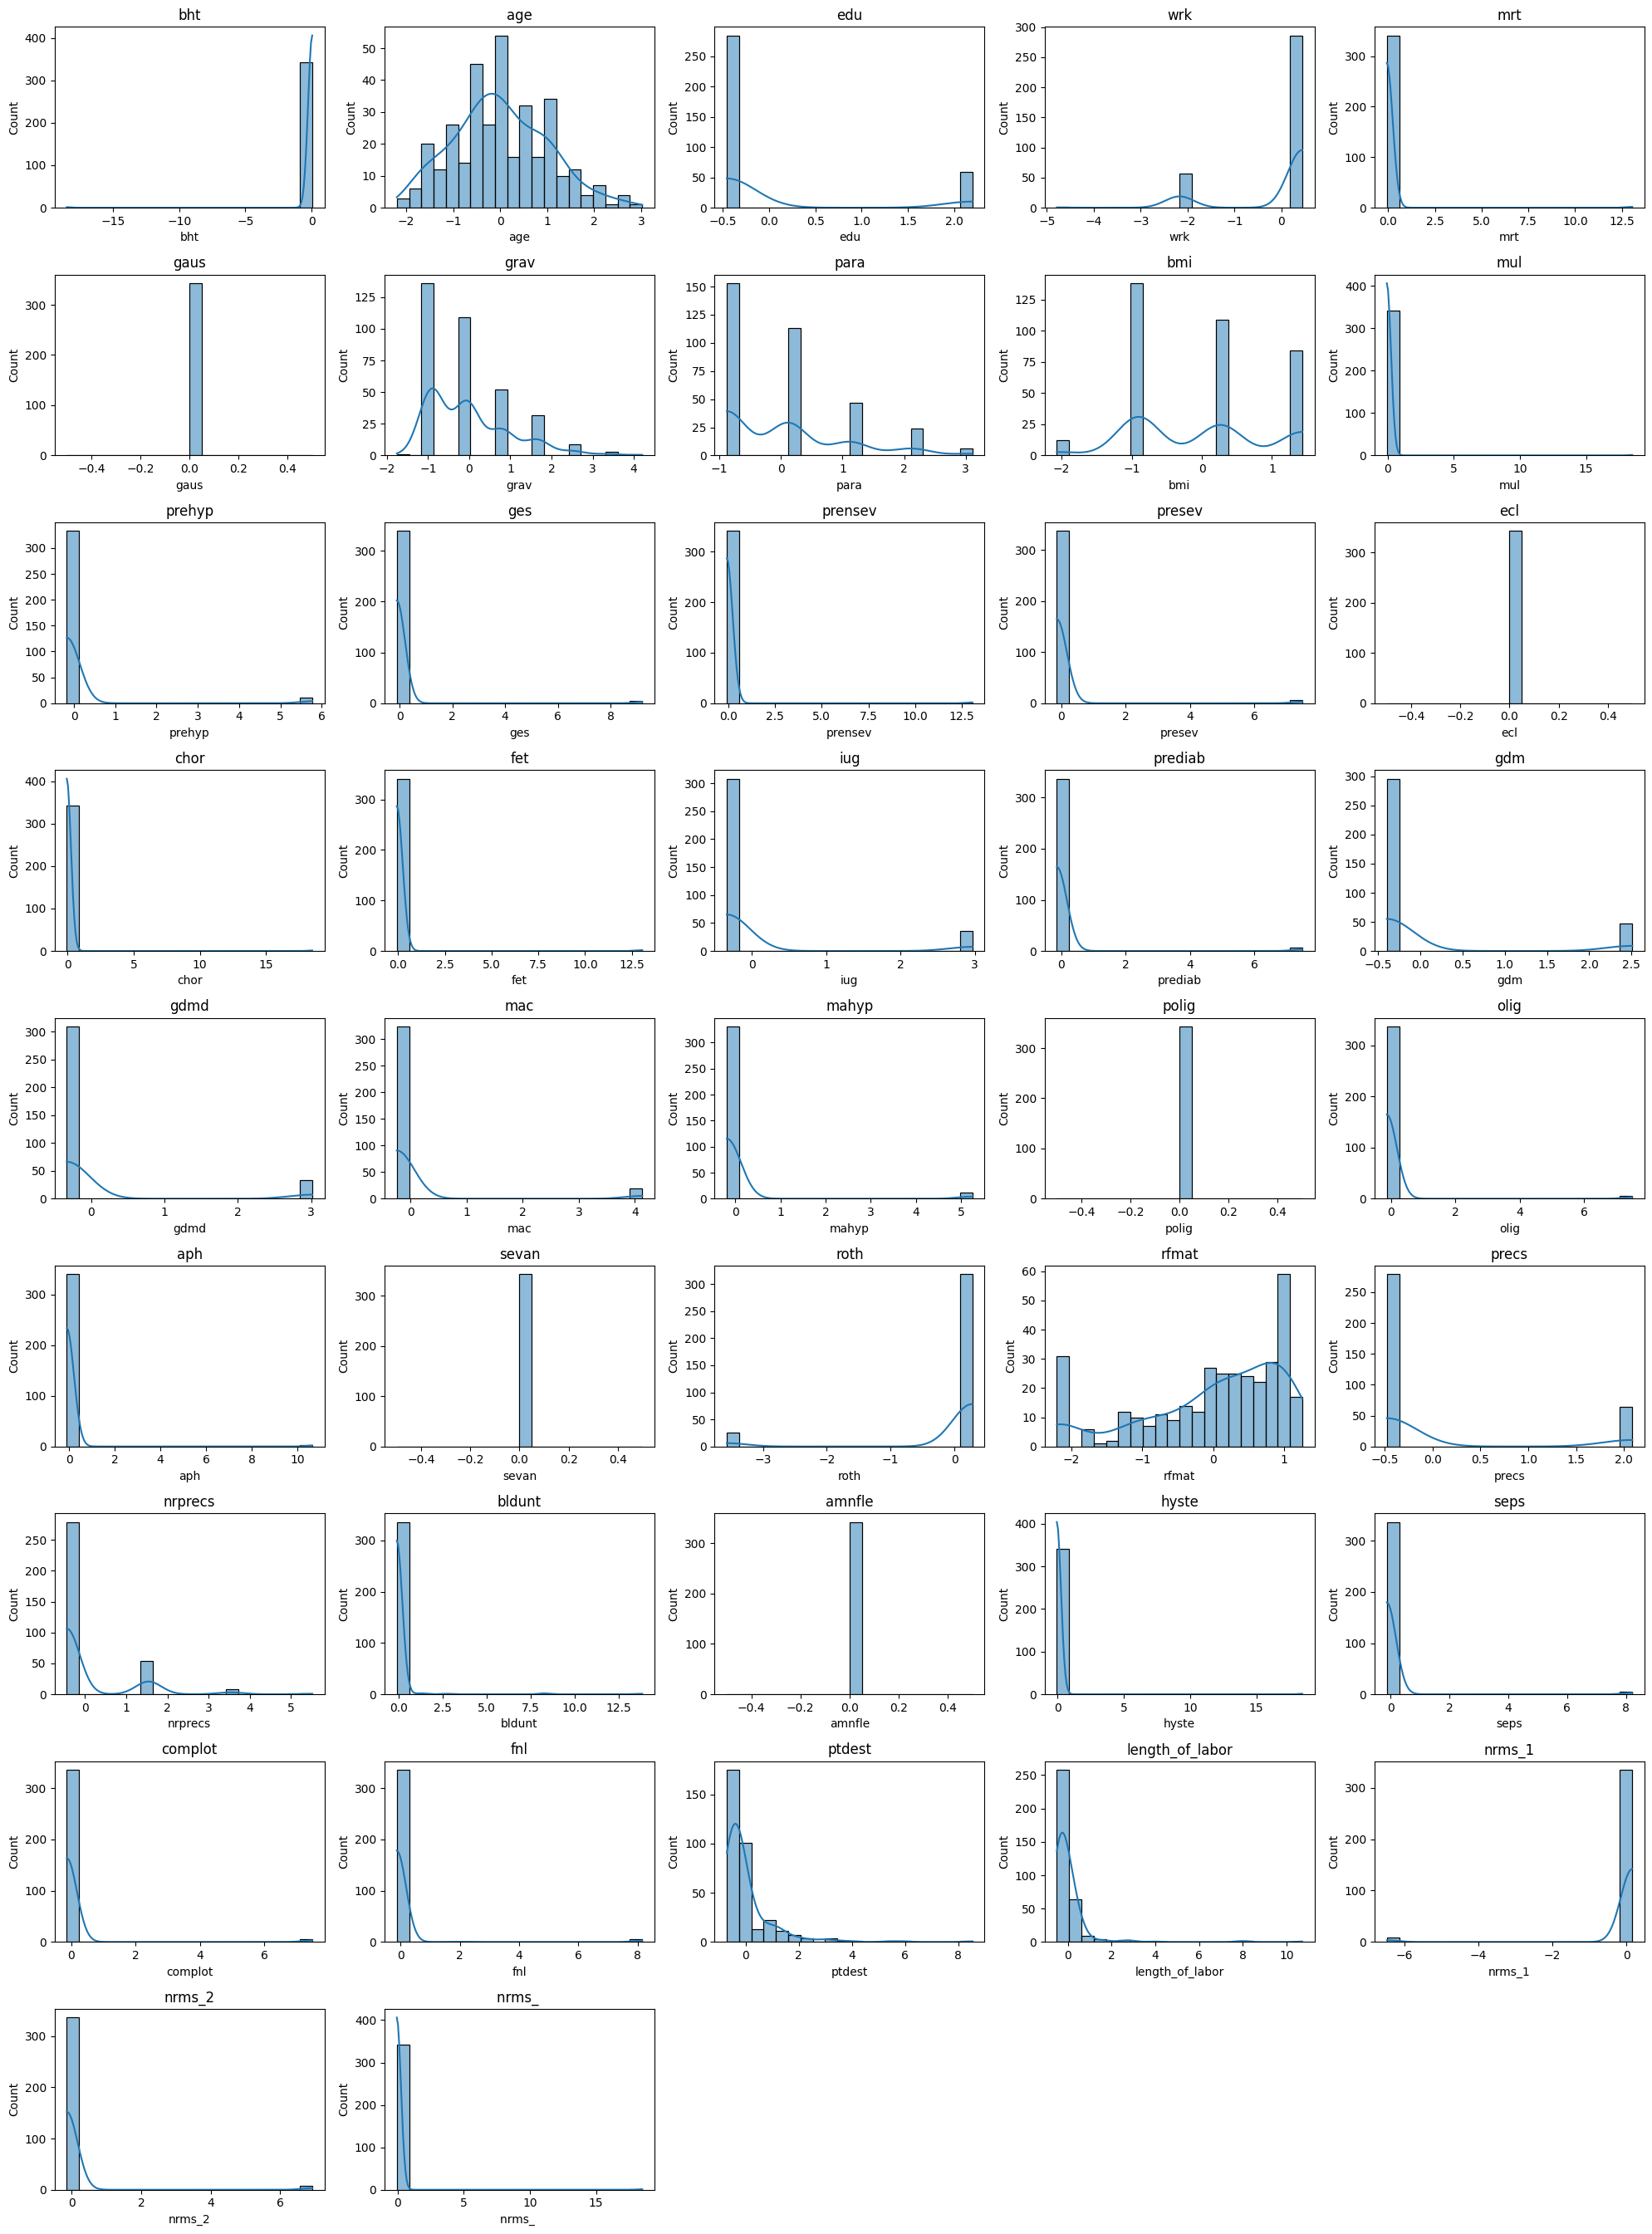

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')  # Uncomment if you're loading the data from a CSV
df_processed=df_encoded
# List of columns you want to visualize
# columns = [ 'ster',  'inster', 'gdm', 'precs', 'nrprecs', 'trlab',
#            'bmi','ptdest','inlab','ga_tot', 'mac','roth', 'iug', 'prehyp',
#            'mahyp','nrms_2','prediab', 'age','olig', 'presev','complot','gdmd','fnl','bldunt',
#            'seps', 'fet', 'mul',  'mrt', 'ges','grav','para','edu','length_of_labor','wrk','field1','rfmat']

columns=X.columns
# Step 2: Initialize the StandardScaler
scaler = StandardScaler()

# Step 3: Fit and transform the scaler on the numeric columns
df_processed[columns] = scaler.fit_transform(X[columns])
# Set up the matplotlib figure
num_cols = len(columns)
cols_per_row = 5  # Adjust the number of columns per row for better visualization
rows = (num_cols + cols_per_row - 1) // cols_per_row  # To determine the number of rows

plt.figure(figsize=(20, rows * 3))  # Adjust the figure size based on number of plots

# Plot each column
for i, col in enumerate(columns, 1):
    plt.subplot(rows, cols_per_row, i)

    # Check the data type to choose between histplot (for numerical) and countplot (for categorical)
    if pd.api.types.is_numeric_dtype(df_processed[col]):
        sns.histplot(df_processed[col], kde=True, bins=20)
    else:
        sns.countplot(x=df_processed[col])

    plt.title(col)

plt.tight_layout()
plt.show()


In [67]:
import pandas as pd

# Assuming your DataFrame is called 'df'
df_processed.to_excel('output_file.xlsx', index=False)  # index=False avoids adding row numbers


In [ ]:
y

,prebrth
0,1
1,1
2,1
3,1
4,1
...,...
338,1
339,1
340,1
341,1


In [ ]:
#Class 2 & 3 were combined and standardised class to (0,1)

y.replace({3: 2}, inplace=True)

# Re-label classes to start from 0
y = y - 1  # Convert {1, 2} -> {0, 1}
print(y.value_counts())

prebrth
0    327
1     16
Name: count, dtype: int64


In [ ]:

features=['gdm', 'precs', 'nrprecs', 'bmi', 'mac']
target=['prebrth']
X=df_processed[features]
y=y

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your label vector
# X = ...
# y = ...

# Stratified split to maintain the class distribution
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution in the training and validation sets
print('Training set class distribution:', np.bincount(y_train))
print('Validation set class distribution:', np.bincount(y_val))

Training set class distribution: [261  13]
Validation set class distribution: [66  3]


In [ ]:
# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold

# model = RandomForestClassifier(class_weight='balanced', random_state=25)
# rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='f1')
# rfecv.fit(X, y)

# print("Optimal number of features: %d" % rfecv.n_features_)
# selected_features = X.columns[rfecv.support_]


In [ ]:
# print(selected_features)

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# # Split data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=23)

# # Initialize model and RFE
# model = RandomForestClassifier(random_state=41)
# rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features

# # Fit RFE
# rfe.fit(X_train, y_train)

# # Check selected features
# selected_features = X_train.columns[rfe.support_]
# print("Selected Features:", selected_features)

# # Evaluate model with selected features
# X_train_rfe = rfe.transform(X_train)
# X_val_rfe = rfe.transform(X_val)
# model.fit(X_train_rfe, y_train)
# y_pred = model.predict(X_val_rfe)
# print("Validation Accuracy:", accuracy_score(y_val, y_pred))

# # Confusion Matrix for validation data
# cm = confusion_matrix(y_val, y_pred)

# # Determine the unique labels in y_val
# unique_labels = np.unique(y_val)

# # Display Confusion Matrix
# print(f"Confusion Matrix :")
# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
# cm_display.plot(cmap='Blues')
# plt.title(f'Confusion Matrix ')
# plt.show()


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import mean_squared_error
# from scipy.optimize import curve_fit
# import matplotlib.pyplot as plt

# # Sample power law function for curve fitting
# def power_law(x, a, b):
#     return a * np.power(x, -b)

# # Function to calculate error rate for increasing dataset sizes
# def learning_curve_analysis(data, target, model, start_size=0.1, end_size=0.9, step=0.1, desired_error=0.05):
#     sample_sizes = []
#     errors = []

#     # Progressively larger subsets
#     for frac in np.arange(start_size, end_size + step, step):
#         # Ensure train_size does not reach 1.0
#         frac = min(frac, 0.99)

#         # Stratified sampling to keep positive class proportion
#         subset, _ = train_test_split(data, train_size=frac, stratify=data[target])
#         X_subset = subset.drop(columns=[target])
#         y_subset = subset[target]

#         # Train model on subset and calculate error
#         model.fit(X_subset, y_subset)
#         y_pred = model.predict(X_subset)
#         error = mean_squared_error(y_subset, y_pred)

#         # Record sample size and error
#         sample_sizes.append(len(y_subset))
#         errors.append(error)

#     # Fit power law curve
#     params, _ = curve_fit(power_law, sample_sizes, errors)
#     a, b = params

#     # Estimate required sample size for desired error
#     required_size = (desired_error / a) ** (1 / -b)

#     # Display results
#     print("Fitted Power Law Parameters: a =", a, ", b =", b)
#     print("Estimated Sample Size for Desired Error:", int(np.ceil(required_size)))

#     # Plotting the curve
#     plt.scatter(sample_sizes, errors, label="Observed Error Rates")
#     plt.plot(sample_sizes, power_law(np.array(sample_sizes), *params), color='r', label="Power Law Fit")
#     plt.xlabel("Sample Size")
#     plt.ylabel("Error Rate")
#     plt.title("Learning Curve Analysis")
#     plt.legend()
#     plt.show()

#     return required_size

# # Example usage:
# # Assuming `df2` is your DataFrame with 'prebrth' as the target column.
# model = LogisticRegression()  # or any other model suitable for binary classification

# # Call the function with modified end_size
# learning_curve_analysis(df2, 'prebrth', model, start_size=0.1, end_size=0.9, step=0.01, desired_error=0.05)




In [ ]:
# print(type(X))

In [ ]:

# features=['ster',  'inster', 'gdm', 'precs', 'nrprecs', 'trlab',
#            'bmi','ptdest','inlab', 'mac','roth', 'iug', 'prehyp',
#            'mahyp','nrms_2','prediab', 'age','olig', 'presev','complot','gdmd','fnl','bldunt',
#            'seps', 'fet', 'mul',  'mrt', 'ges','grav','para','edu','wrk','rfmat']
# # features=['inster', 'bmi', 'ptdest', 'inlab', 'age', 'rfmat']
# # features=['age', 'edu', 'wrk', 'mrt', 'grav', 'prehyp', 'bmi', 'rfmat','ster','gdm','precs']
# # features=['ster', 'inster', 'gdm', 'precs', 'nrprecs', 'trlab','bmi','ptdest','inlab']
# # features=['age', 'edu', 'wrk', 'mrt', 'grav', 'prehyp', 'bmi', 'rfmat']
# # features=['inster','age','rfmat','bmi','ptdest','grav','inlab','para','bldunt','wrk']
# # features=[
# #     'roth',
# #     'iug',
# #     'prehyp',
# #     'mahyp',
# #     'nrms_2',
# #     'prediab',
# #     'age',
# #     'olig',
# #     'presev',
# #     'complot'
# # ]
# # features=['ster', 'inster', 'gdm', 'precs', 'nrprecs', 'trlab','bmi']
# target=['prebrth']
# X=df_processed[features]
# y=df_processed[target]

* **Random** **forest classifier**

In [ ]:
# import pandas as pd
# from sklearn.model_selection import StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score


# # # Step 2: Feature Selection
# # # Assuming 'features' contains the feature column names and 'target' is the target column
# # X = X_combined # Replace 'features' with actual feature column names
# # y = y_combined_prebrth   # Replace 'target' with your target column

# # Step 3: Initialize Stratified K-Fold (to maintain the balance of classes in each fold)
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# # Step 4: Initialize variables to store results
# balanced_accuracy_scores = []
# fold = 1

# # Step 5: K-Fold Cross-validation
# for train_index, test_index in kf.split(X, y):
#     print(f"\nFold {fold}")

#     # Split the data into train and test for this fold
#     X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
#     y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

#     # Initialize the Random Forest model
#     rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced')

#     # Fit the model
#     rf_model.fit(X_train_cv, y_train_cv)

#     # Predict on test set
#     y_pred = rf_model.predict(X_test_cv)

#     # Compute balanced accuracy
#     balanced_acc = balanced_accuracy_score(y_test_cv, y_pred)
#     balanced_accuracy_scores.append(balanced_acc)

#     # Print balanced accuracy for this fold
#     print(f"Balanced Accuracy for fold {fold}: {balanced_acc:.4f}")

#     # Classification report for each fold (optional)
#     print("Classification Report:\n", classification_report(y_test_cv, y_pred))

#     # Confusion Matrix for validation data
#     cm = confusion_matrix(y_test_cv, y_pred)

#     # Determine the unique labels in y_val
#     unique_labels = np.unique(y_test_cv)

#     # Display Confusion Matrix
#     print(f"Confusion Matrix :Fold {fold}")
#     cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
#     cm_display.plot(cmap='Blues')
#     plt.title(f'Confusion Matrix-Fold {fold} ')
#     plt.show()

#     fold += 1

# # Step 6: Compute the mean balanced accuracy across all folds
# mean_balanced_accuracy = sum(balanced_accuracy_scores) / len(balanced_accuracy_scores)
# print(f"\nMean Balanced Accuracy across all folds: {mean_balanced_accuracy:.4f}")

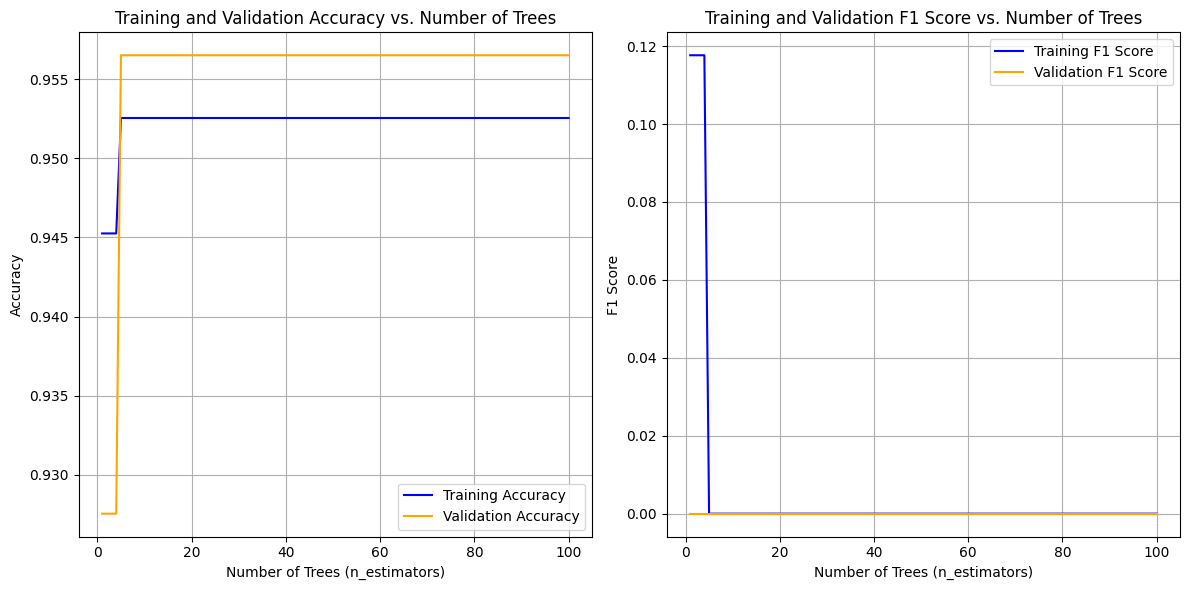

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# # Generate a synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameters for Random Forest
max_n_estimators = 100  # Total number of trees to evaluate
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Train Random Forest Classifier with increasing number of trees
for n in range(1, max_n_estimators + 1):
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict and calculate accuracy and F1 score
    train_pred = rf_model.predict(X_train)
    val_pred = rf_model.predict(X_val)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    val_accuracies.append(accuracy_score(y_val, val_pred))
    train_f1_scores.append(f1_score(y_train, train_pred))
    val_f1_scores.append(f1_score(y_val, val_pred))

# Plotting the accuracies
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, max_n_estimators + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, max_n_estimators + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot F1 Score
plt.subplot(1, 2, 2)
plt.plot(range(1, max_n_estimators + 1), train_f1_scores, label='Training F1 Score', color='blue')
plt.plot(range(1, max_n_estimators + 1), val_f1_scores, label='Validation F1 Score', color='orange')
plt.title('Training and Validation F1 Score vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


* **Support vector machine**

Training set class distribution: [261  13]
Validation set class distribution: [66  3]
Confusion Matrix for Fold 1:


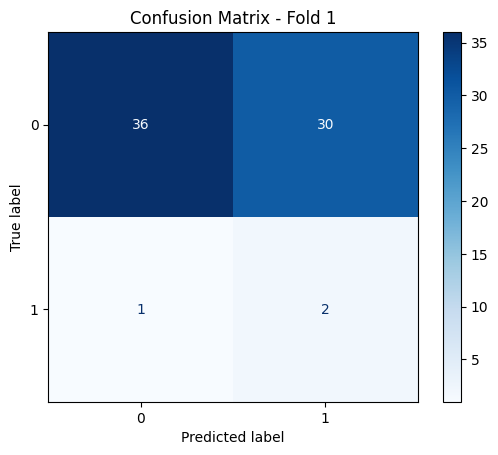

Training set class distribution: [261  13]
Validation set class distribution: [66  3]
Confusion Matrix for Fold 2:


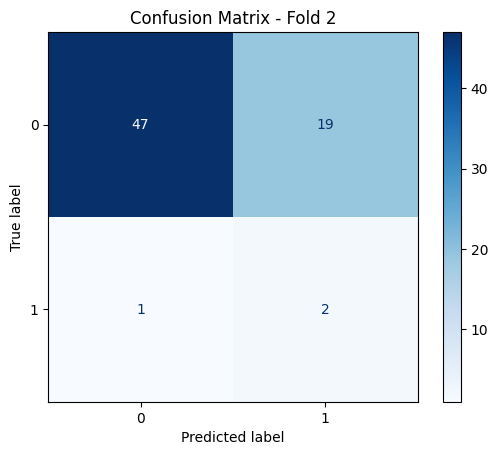

Training set class distribution: [262  12]
Validation set class distribution: [65  4]
Confusion Matrix for Fold 3:


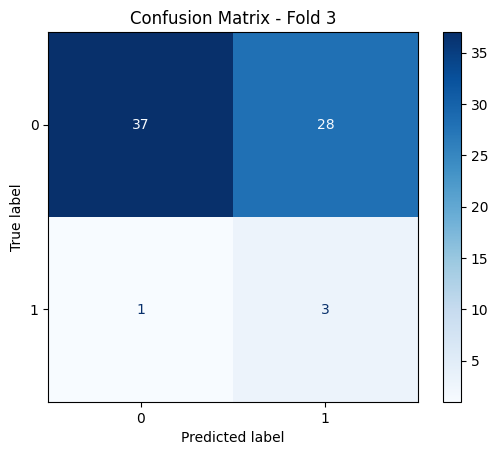

Training set class distribution: [262  13]
Validation set class distribution: [65  3]
Confusion Matrix for Fold 4:


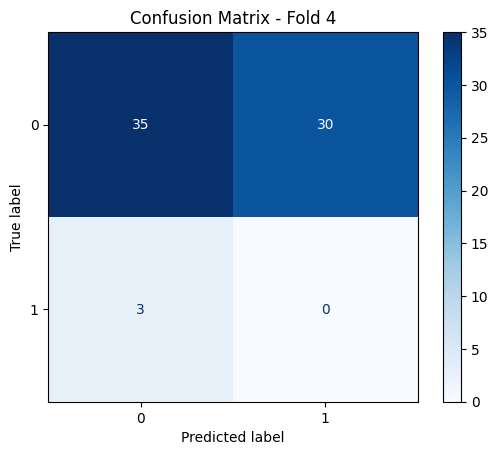

Training set class distribution: [262  13]
Validation set class distribution: [65  3]
Confusion Matrix for Fold 5:


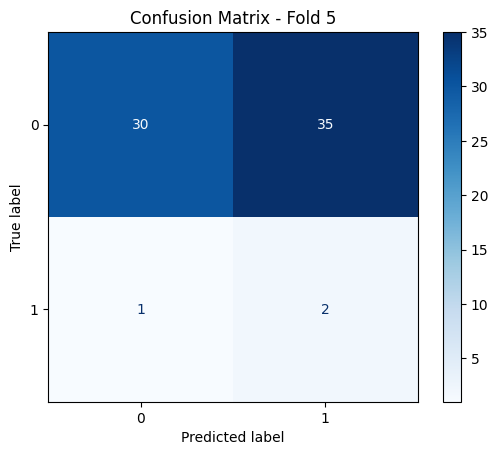

Average Training Accuracy: 0.5729
Average Validation Accuracy: 0.5652
Average Training F1 Score: 0.1248
Average Validation F1 Score: 0.1105


In [ ]:
#--------LinearSVC--------------#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# # Generate a synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Parameters for k-fold cross-validation
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Initialize SVM model
svm_model = LinearSVC(class_weight='balanced', random_state=42)

# K-fold Cross Validation
fold = 1  # To track the fold number
for train_index, val_index in kf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model on k-1 folds
    svm_model.fit(X_train, y_train)

    # Predictions
    train_pred = svm_model.predict(X_train)
    val_pred = svm_model.predict(X_val)

    # Calculate Accuracy and F1 Score
    train_accuracies.append(accuracy_score(y_train, train_pred))
    val_accuracies.append(accuracy_score(y_val, val_pred))
    train_f1_scores.append(f1_score(y_train, train_pred))
    val_f1_scores.append(f1_score(y_val, val_pred))

    print('Training set class distribution:', np.bincount(y_train))
    print('Validation set class distribution:', np.bincount(y_val))

    # Confusion Matrix for validation data
    cm = confusion_matrix(y_val, val_pred)

    # Determine the unique labels in y_val
    unique_labels = np.unique(y_val)

    # Display Confusion Matrix
    print(f"Confusion Matrix for Fold {fold}:")
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    cm_display.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

    fold += 1  # Increment fold number

# Calculate average scores
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)
avg_train_f1 = np.mean(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)

# Output average scores
print(f'Average Training Accuracy: {avg_train_accuracy:.4f}')
print(f'Average Validation Accuracy: {avg_val_accuracy:.4f}')
print(f'Average Training F1 Score: {avg_train_f1:.4f}')
print(f'Average Validation F1 Score: {avg_val_f1:.4f}')


Training set class distribution: [261  13]
Validation set class distribution: [66  3]
Confusion Matrix for Fold 1:


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

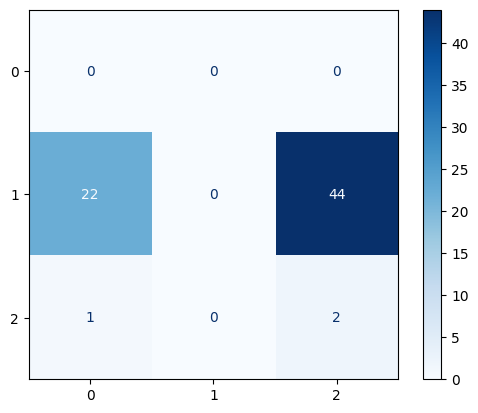

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# # Generate a synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
# X = pd.DataFrame(X)  # Convert to DataFrame for compatibility with iloc
# y = pd.Series(y)     # Convert to Series for compatibility with iloc

# Parameters for k-fold cross-validation
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Initialize SVM model
svm_model = OneClassSVM(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, nu=0.5, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

# K-fold Cross Validation
fold = 1  # To track the fold number
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model on k-1 folds
    svm_model.fit(X_train, y_train)

    # Predictions
    train_pred = svm_model.predict(X_train)
    val_pred = svm_model.predict(X_val)

    # Calculate Accuracy and F1 Score
    train_accuracies.append(accuracy_score(y_train, train_pred))
    val_accuracies.append(accuracy_score(y_val, val_pred))
    train_f1_scores.append(f1_score(y_train, train_pred, average='weighted'))
    val_f1_scores.append(f1_score(y_val, val_pred, average='weighted'))

    print('Training set class distribution:', np.bincount(y_train))
    print('Validation set class distribution:', np.bincount(y_val))

    # Confusion Matrix for validation data
    cm = confusion_matrix(y_val, val_pred)

    # Determine the unique labels in y_val
    unique_labels = np.unique(y_val)

    # Display Confusion Matrix
    print(f"Confusion Matrix for Fold {fold}:")
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels+1)
    cm_display.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

    fold += 1  # Increment fold number

# Calculate average scores
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)
avg_train_f1 = np.mean(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)

# Output average scores
print(f'Average Training Accuracy: {avg_train_accuracy:.4f}')
print(f'Average Validation Accuracy: {avg_val_accuracy:.4f}')
print(f'Average Training F1 Score: {avg_train_f1:.4f}')
print(f'Average Validation F1 Score: {avg_val_f1:.4f}')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming X and y are already loaded as DataFrames
# X = ...
# y = ...



# Separate the class 0 data for training
df_train = df_processed[df_processed['prebrth'] == 0]


features=['gdm', 'precs', 'nrprecs', 'bmi', 'mac']
target=['prebrth']
X_tr=df_train[features]
y_tr=df_train[target]


# Parameters for k-fold cross-validation
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

val_accuracies = []
val_f1_scores = []

# Initialize OneClassSVM model
svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.5)

# K-fold Cross Validation
fold = 1  # To track the fold number
for train_index, val_index in kf.split(X_tr, y_tr):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model on only the class 0 data
    svm_model.fit(X_train)

    # Predictions
    val_pred = svm_model.predict(X_val)

    # Remap OneClassSVM predictions: 1 -> 0 (normal), -1 -> 1 (anomaly)
    val_pred = np.where(val_pred == 1, 0, 1)

    # Calculate Accuracy and F1 Score
    val_accuracies.append(accuracy_score(y_val, val_pred))
    val_f1_scores.append(f1_score(y_val, val_pred, average='weighted'))

    print('Validation set class distribution:', np.bincount(y_val))

    # Confusion Matrix for validation data
    cm = confusion_matrix(y_val, val_pred)

    # Display Confusion Matrix
    print(f"Confusion Matrix for Fold {fold}:")
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    cm_display.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

    fold += 1  # Increment fold number

# Calculate average scores
avg_val_accuracy = np.mean(val_accuracies)
avg_val_f1 = np.mean(val_f1_scores)

# Output average scores
print(f'Average Validation Accuracy: {avg_val_accuracy:.4f}')
print(f'Average Validation F1 Score: {avg_val_f1:.4f}')

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

* **XGBoost**

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from xgboost import XGBClassifier
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# # # Generate a synthetic dataset
# # X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# # Parameters for k-fold cross-validation
# k = 5  # Number of folds
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# train_accuracies = []
# val_accuracies = []
# train_f1_scores = []
# val_f1_scores = []

# # Initialize XGBoost model
# xgb_model = XGBClassifier(
#     scale_pos_weight=1,
#     learning_rate=0.01,
#     n_estimators=100,
#     max_depth=5,
#     # reg_lambda=0.2,
#     # reg_alpha=0.5,
#     use_label_encoder=False,
#     eval_metric='mlogloss',
#     random_state=42
# )

# # K-fold Cross Validation
# fold = 1  # To track the fold number
# for train_index, val_index in kf.split(X,y):
#     X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#     # Fit model on the entire resampled training set
#     xgb_model.fit(X_train, y_train)

#     # Predictions
#     train_pred = xgb_model.predict(X_train)
#     val_pred = xgb_model.predict(X_val)

#     # # Make predictions on the test set
#     # y_pred = xgb_model.predict(X_val)

#     # Calculate Accuracy and F1 Score
#     train_accuracies.append(accuracy_score(y_train, train_pred))
#     val_accuracies.append(accuracy_score(y_val, val_pred))
#     train_f1_scores.append(f1_score(y_train, train_pred))
#     val_f1_scores.append(f1_score(y_val, val_pred))

#     # Confusion Matrix for validation data
#     cm = confusion_matrix(y_val, val_pred)

#     # Compute confusion matrix
#     # cm = confusion_matrix(y_test, y_test_pred)

#     # Dynamically retrieve unique labels in y_test
#     unique_labels = np.unique(y_val)

#     # Display confusion matrix
#     print(f"Confusion Matrix for Fold {fold}:")
#     cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)

#     # Plot with the appropriate number of labels
#     cm_display.plot(cmap='Blues')
#     plt.title(f'Confusion Matrix - Fold {fold}')
#     plt.show()

#     fold += 1  # Increment fold number

# # Calculate average scores
# avg_train_accuracy = np.mean(train_accuracies)
# avg_val_accuracy = np.mean(val_accuracies)
# avg_train_f1 = np.mean(train_f1_scores)
# avg_val_f1 = np.mean(val_f1_scores)

# # Output average scores
# print(f'Average Training Accuracy: {avg_train_accuracy:.4f}')
# print(f'Average Validation Accuracy: {avg_val_accuracy:.4f}')
# print(f'Average Training F1 Score: {avg_train_f1:.4f}')
# print(f'Average Validation F1 Score: {avg_val_f1:.4f}')

* **1D CNN**

In [ ]:

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import regularizers

# import os
# import tempfile

# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns

# import sklearn
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split

In [ ]:
# # Split the dataset into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Further split the training set into training and validation sets (80% train, 20% validation of the training set)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define METRICS
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.BinaryCrossentropy(name='bce'),
    keras.metrics.CategoricalAccuracy(name='cat_acc'),
    keras.metrics.F1Score(name='f1_score')
]


In [ ]:
# EPOCHS = 100
# BATCH_SIZE = 64

def get_early_stopping():
 return tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',kernel_regularizer=keras.regularizers.l2(0.1),
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001),
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
# After compiling the model
print(model.metrics_names)


In [ ]:
model = make_model()
model.summary()

In [ ]:
# model.predict(X_test)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32,callbacks=[get_early_stopping()])

# Extract the loss and accuracy for both training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs_range = range(len(train_loss))

# Plot Loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.show()


In [ ]:
# Assuming y_test are the true labels and X_test are your test features
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Binarizing predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Evaluate the model on the test set
results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)

# Print evaluation results
print("Loss: {:0.4f}".format(results[0]))

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Extract the loss and accuracy for both training and validation
train_loss = results.history['loss']
val_loss = results.history['val_loss']
train_acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

# Get the number of epochs
epochs_range = range(len(train_loss))

# Plot Loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.show()


# Prediction Model

## XGBoost

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score

In [ ]:
df=df_processed

In [ ]:
# import pandas as pd
# import numpy as np
# import torch
# from transformers import AutoTokenizer, AutoModel
# from scipy.sparse import hstack, csr_matrix

# # Load your dataset
# columns_wt_str_ = ['rfmat']

# # Filter the list to include only the columns that are present in the DataFrame
# columns_to_process = [col for col in columns_wt_str_ if col in df.columns]

# # Load BioBERT model and tokenizer
# model_name = 'emilyalsentzer/Bio_ClinicalBERT'
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name)

# # Function to get embeddings
# def get_embeddings(texts):
#     # Tokenize the input texts
#     inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)

#     # Forward pass through BioBERT model
#     with torch.no_grad():
#         outputs = model(**inputs)

#     # The last hidden state is the output embeddings
#     embeddings = outputs.last_hidden_state

#     # Extract the [CLS] token embeddings (the first token in each sequence)
#     cls_embeddings = embeddings[:, 0, :].numpy()

#     return cls_embeddings

# # Initialize a list to hold all embeddings
# all_embeddings = []

# # Loop over each column and apply the embedding extraction
# for col in columns_to_process:
#     df[col] = df[col].fillna('UNKNOWN')  # Replace NaNs with 'UNKNOWN'
#     text_data = df[col].astype(str).tolist()

#     # Apply the function to the selected column
#     embeddings = get_embeddings(text_data)

#     # Append embeddings to the list
#     all_embeddings.append(embeddings)

#     # Optionally, display the shape of embeddings for each column
#     print(f"Embeddings for column {col} shape:", embeddings.shape)

# # Stack all embeddings horizontally
# combined_embeddings = np.hstack(all_embeddings)

# # Combine numerical features and text embeddings
# numeric_features = ['age', 'edu', 'wrk', 'mrt', 'grav', 'prehyp', 'bmi']
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
#     ('scaler', StandardScaler())])  # Standardize numerical features

# # Fit and transform numerical features
# X_num = df[numeric_features]
# numeric_transformed = numeric_transformer.fit_transform(X_num)

# # Combine numerical and text features
# X_combined = hstack([csr_matrix(numeric_transformed), csr_matrix(combined_embeddings)])

# # Display the shape of the combined features
# print("Shape of combined features:", X_combined.shape)


In [ ]:
# df['prebrth'].value_counts()

In [ ]:
# df_NEW = df.copy()
# df_NEW['prebrth'].replace({3: 2}, inplace=True)

# # Re-label classes to start from 0
# df_NEW['prebrth'] = df_NEW['prebrth'] - 1  # Convert {1, 2} -> {0, 1}
# print(df_NEW['prebrth'].value_counts())

# # # train_data, temp_data = train_test_split(df_NEW, test_size=0.4, random_state=42, stratify=data['prebrth'])
# # # Extract 2 samples from class 1
# # class_1_samples = df_NEW[df_NEW['prebrth'] == 1].sample(n=5, random_state=42)

# # # Extract 10 samples from class 2
# # class_2_samples = df_NEW[df_NEW['prebrth'] == 0].sample(n=5, random_state=42)

# # # Combine the extracted samples into a new DataFrame
# # extracted_samples = pd.concat([class_1_samples, class_2_samples], axis=0)

# # # Display the extracted samples
# # print(extracted_samples)

In [ ]:
# # Separate features and target
# features = ['antb', 'ster', 'ifant', 'inster', 'gdm', 'precs', 'nrprecs', 'trlab',
#            'bmi', 'gdmd', 'olig', 'bldtr', 'ga_tot', 'mac', 'iug', 'prehyp',
#            'mahyp', 'rfmat', 'roth', 'prediab', 'age', 'presev', 'grav', 'bldunt',
#            'seps', 'fet', 'mul', 'para', 'mrt', 'ges', 'n1aspx', 'edu','wrk']
# # features=['age', 'edu', 'wrk', 'mrt', 'grav', 'prehyp', 'bmi', 'rfmat']
# target = 'prebrth'

# # Extract features and target
# X = df_NEW[features]
# y_prebrth = df_NEW[target]


In [ ]:
# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_prebrth, test_size=0.3, random_state=42, stratify=y_prebrth)

# # Handle class imbalance using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# print("Resampled training class distribution:", Counter(y_resampled))

In [ ]:
# # Initialize XGBoost model
# xgb_model = XGBClassifier(
#     scale_pos_weight=1,
#     learning_rate=0.0001,
#     n_estimators=100,
#     max_depth=5,
#     # reg_lambda=0.2,
#     # reg_alpha=0.5,
#     use_label_encoder=False,
#     eval_metric='mlogloss',
#     random_state=42
# )

In [ ]:
# # Fit model on the entire resampled training set
# xgb_model.fit(X_resampled, y_resampled)

# # Make predictions on the test set
# y_pred = xgb_model.predict(X_test)

# # Evaluate the model
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))
# print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
# print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}")

## LSTM_1D CNN

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, MaxPooling1D, Flatten, BatchNormalization

In [ ]:
# df=df_encoded

In [ ]:
# # Define model architecture
# def create_lstm_cnn_model(input_shape):
#     # Input layer
#     input_layer = Input(shape=input_shape)

#     # 1D Convolutional layer
#     cnn = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
#     cnn = MaxPooling1D(pool_size=2)(cnn)
#     cnn = BatchNormalization()(cnn)

#     # Another convolutional block
#     cnn = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(cnn)
#     cnn = MaxPooling1D(pool_size=2)(cnn)
#     cnn = BatchNormalization()(cnn)

#     # No Flatten Layer here - LSTM expects 3D input

#     # LSTM Layer
#     lstm = LSTM(100, return_sequences=False)(cnn)  # Make sure CNN output is still 3D

#     # Fully connected layer
#     dense = Dense(64, activation='relu')(lstm)
#     dense = Dropout(0.5)(dense)

#     # Output layer (binary classification: prebirth or not)
#     output = Dense(1, activation='sigmoid')(dense)

#     # Create the model
#     model = Model(inputs=input_layer, outputs=output)

#     # Compile the model
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     return model

# # Define the input shape
# # Assuming you have time steps and features per time step
# input_shape = (458,33)  # 100 time steps, 7 features

# # Create the model
# model = create_lstm_cnn_model(input_shape)

# # Print the model summary
# model.summary()

# # Assuming you have X_train and y_train ready for training
# # Example:
# # X_train shape: (num_samples, 100, 7)
# # y_train shape: (num_samples, )
# # Reshape X to simulate time steps (if appropriate for your problem)
# # Convert the DataFrame to a NumPy array
# X_array = X_resampled.values

# # Reshape the NumPy array
# X_reshaped = X_array.reshape((458, 1, 33))


# # Train the model
# history = model.fit(X_reshaped, y_resampled, epochs=20, batch_size=32, validation_split=0.2)

# # Evaluate the model
# results = model.evaluate(X_test, y_test)
# print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")


## LSTM_RNN

In [ ]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# # Reshape the data: (samples, time_steps, features)
# X_reshaped = X_resampled.values.reshape((458, 33, 1))  # 458 samples, 33 timesteps, 1 feature per timestep

# # Define the LSTM model
# model = Sequential()

# # LSTM layer
# model.add(LSTM(100, input_shape=(33, 1), return_sequences=False))  # 33 time steps, 1 feature per timestep

# # Batch normalization (optional)
# model.add(BatchNormalization())

# # Fully connected layer
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

# # Output layer for binary classification
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_reshaped, y_resampled, epochs=20, batch_size=32, validation_split=0.2)

# # Model summary
# model.summary()


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
338    0
339    0
340    0
341    0
342    0
Name: prebrth, Length: 343, dtype: int64


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, BatchNormalization, Input
from imblearn.over_sampling import SMOTE

# Assuming X and y are your original data and labels

# # Step 1: Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert X_resampled to a NumPy array if it is a DataFrame
X_resampled = np.array(X)

# Step 2: Reshape the resampled data for LSTM (samples, timesteps, features)
# Ensure timesteps and features match your data
timesteps = 1  # This should be the number of timesteps you intend to use
features = X_resampled.shape[1] // timesteps  # Compute number of features per timestep

X_resampled = X_resampled.reshape((X_resampled.shape[0], timesteps, features))

# Step 3: Define the LSTM model
def create_model():
    inputs = Input(shape=(timesteps, features))  # timesteps, features per timestep
    x = Bidirectional(LSTM(100, return_sequences=False))(inputs)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Set up 5-fold cross-validation
skf = StratifiedKFold(n_splits=5)
results = []

for train_index, test_index in skf.split(X_resampled, y):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = np.array(y[train_index]), np.array(y[test_index])  # Convert to numpy arrays

    # Step 5: Train the model (using class_weight to handle imbalance)
    class_weight = {0: 1, 1: 20}  # Adjust the class weights according to your dataset
    model = create_model()  # Create a fresh model for each fold
    model.fit(X_train, y_train, epochs=50, batch_size=32, class_weight=class_weight, verbose=1)

    # Step 6: Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Calculate metrics
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Step 7: Print cross-validation results
for fold, result in enumerate(results):
    print(f"Fold {fold + 1} - Balanced Accuracy: {result['balanced_accuracy']:.4f}, Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1 Score: {result['f1_score']:.4f}")


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5083 - loss: 1.7060
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5788 - loss: 2.0833 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5242 - loss: 1.5168 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5123 - loss: 1.8084 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5137 - loss: 1.9026
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5578 - loss: 1.7101 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5537 - loss: 1.6923 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5116 - loss: 1.4708 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5736 - loss: 1.5527 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6106 - loss: 1.2246 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4981 - loss: 1.5358
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5367 - loss: 1.4173 
E

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2358 - loss: 1.7724
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4029 - loss: 1.4870
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4047 - loss: 1.7914
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5211 - loss: 1.7750
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5120 - loss: 1.5524
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5027 - loss: 1.5966
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4649 - loss: 1.5684
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4812 - loss: 1.4761
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5038 - loss: 1.2621
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5636 - loss: 1.3203
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5415 - loss: 1.3715
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/s

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Bidirectional, LSTM, Reshape
from tensorflow.keras.models import Model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score

# Step 1: Convert X_resampled to a numpy array
X_resampled = np.array(X_resampled)

# Step 2: Reshape the resampled data for LSTM (samples, timesteps, features)
timesteps = 1  # This should be the number of timesteps you intend to use
features = X_resampled.shape[1] // timesteps  # Compute number of features per timestep

X_resampled = X_resampled.reshape((X_resampled.shape[0], timesteps, features))

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# Step 3: Define the LSTM model
def create_model(timesteps, features):
    inputs = Input(shape=(timesteps, features))  # timesteps, features per timestep
    x = Bidirectional(LSTM(100, return_sequences=True))(inputs)
    x = AttentionLayer()(x)
    x = Reshape((x.shape[1],))(x)  # Ensure the output has the correct shape
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
timesteps = 33
features = X_resampled.shape[2]
model = create_model(timesteps, features)

# Step 4: Set up 5-fold cross-validation
skf = StratifiedKFold(n_splits=5)
results = []

for train_index, test_index in skf.split(X_resampled, y):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = np.array(y[train_index]), np.array(y[test_index])  # Convert to numpy arrays

    # Step 5: Train the model (using class_weight to handle imbalance)
    class_weight = {0: 1, 1: 30}  # Adjust the class weights according to your dataset
    model = create_model(timesteps, features)  # Create a fresh model for each fold
    model.fit(X_train, y_train, epochs=50, batch_size=32, class_weight=class_weight, verbose=1)

    # Step 6: Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Calculate metrics
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Step 7: Print cross-validation results
for fold, result in enumerate(results):
    print(f"Fold {fold + 1} - Balanced Accuracy: {result['balanced_accuracy']:.4f}, Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1 Score: {result['f1_score']:.4f}")


ValueError: cannot reshape array of size 1715 into shape (343,1,1)

In [ ]:
model.save_weights('C:\Mathru\prebrth_prdiction\weights\LSTM_RNN.weights.h5')


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score

# Step 1: Convert X_resampled to a numpy array
X_resampled = np.array(X_resampled)

# Step 2: Reshape the resampled data for CNN (samples, timesteps, features)
timesteps = 33  # This should be the number of timesteps you intend to use
features = X_resampled.shape[1] // timesteps  # Compute number of features per timestep

X_resampled = X_resampled.reshape((X_resampled.shape[0], timesteps, features))

# Step 3: Define the iD CNN model
def create_model(timesteps, features):
    inputs = Input(shape=(timesteps, features))  # timesteps, features per timestep
    # x = Conv1D(filters=128, kernel_size=3, dilation_rate=1, activation='relu', padding='causal')(inputs)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)
    x = Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu', padding='causal')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv1D(filters=32, kernel_size=3, dilation_rate=4, activation='relu', padding='causal')(x)
    x = GlobalMaxPooling1D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='softmax')(x)  # Binary classification
    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
timesteps = 33
features = X_resampled.shape[2]
model = create_model(timesteps, features)

# Step 4: Set up 5-fold cross-validation
skf = StratifiedKFold(n_splits=5)
results = []

for train_index, test_index in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = np.array(y_resampled[train_index]), np.array(y_resampled[test_index])  # Convert to numpy arrays

    # Step 5: Train the model (using class_weight to handle imbalance)
    class_weight = {0: 1, 1: 1}  # Adjust the class weights according to your dataset
    model = create_model(timesteps, features)  # Create a fresh model for each fold

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=200, batch_size=64, class_weight=class_weight, verbose=1)

    # Step 6: Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Calculate metrics
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Step 7: Print cross-validation results
for fold, result in enumerate(results):
    print(f"Fold {fold + 1} - Balanced Accuracy: {result['balanced_accuracy']:.4f}, Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1 Score: {result['f1_score']:.4f}")


In [ ]:
# Step 7: Plot accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Conv1D, GlobalMaxPooling1D, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Convert X_resampled to a numpy array
X_resampled = np.array(X_resampled)

# Step 2: Reshape the resampled data for CNN (samples, timesteps, features)
timesteps = 33  # This should be the number of timesteps you intend to use
features = X_resampled.shape[1] // timesteps  # Compute number of features per timestep

X_resampled = X_resampled.reshape((X_resampled.shape[0], timesteps, features))

# Step 3: Define the hybrid 1D CNN-LSTM model with regularization and learning rate
def create_model(timesteps, features, learning_rate=0.001):
    inputs = Input(shape=(timesteps, features))  # timesteps, features per timestep
    x = Conv1D(filters=128, kernel_size=3, dilation_rate=1, activation='relu', padding='causal', kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu', padding='causal', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv1D(filters=32, kernel_size=3, dilation_rate=4, activation='relu', padding='causal', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    # x = GlobalMaxPooling1D()(x)  # Apply pooling after the last Conv1D layer
    x = LSTM(64, return_sequences=True)(x)  # Add LSTM layer
    x = LSTM(32)(x)  # Add another LSTM layer
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='softmax')(x)  # Binary classification
    model = Model(inputs=inputs, outputs=outputs)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
timesteps = 33
features = X_resampled.shape[2]
learning_rate = 0.001
model = create_model(timesteps, features, learning_rate)

# Step 4: Set up 5-fold cross-validation
skf = StratifiedKFold(n_splits=5)
results = []

for train_index, test_index in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = np.array(y_resampled[train_index]), np.array(y_resampled[test_index])  # Convert to numpy arrays

    # Step 5: Train the model (using class_weight to handle imbalance)
    class_weight = {0: 1, 1: 20}  # Adjust the class weights according to your dataset
    model = create_model(timesteps, features, learning_rate)  # Create a fresh model for each fold
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, class_weight=class_weight, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

    # Step 6: Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Calculate metrics
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Step 7: Plot accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step 8: Print cross-validation results
for fold, result in enumerate(results):
    print(f"Fold {fold + 1} - Balanced Accuracy: {result['balanced_accuracy']:.4f}, Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1 Score: {result['f1_score']:.4f}")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam ,SGD
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Convert X_resampled to a numpy array
X_resampled = np.array(X_resampled)

# Step 2: Reshape the resampled data for CNN (samples, timesteps, features)
timesteps = 33  # This should be the number of timesteps you intend to use
features = X_resampled.shape[1] // timesteps  # Compute number of features per timestep

X_resampled = X_resampled.reshape((X_resampled.shape[0], timesteps, features))

# Step 3: Define the iD CNN model with regularization and learning rate
def create_model(timesteps, features, learning_rate=0.001):
    inputs = Input(shape=(timesteps, features))  # timesteps, features per timestep
    x = Conv1D(filters=128, kernel_size=3, dilation_rate=1, activation='relu', padding='causal', kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu', padding='causal', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv1D(filters=32, kernel_size=3, dilation_rate=4, activation='relu', padding='causal', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = GlobalMaxPooling1D()(x)  # Apply pooling after the last Conv1D layer
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='softmax')(x)  # Binary classification
    model = Model(inputs=inputs, outputs=outputs)

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
timesteps = 33
features = X_resampled.shape[2]
learning_rate = 0.0001
model = create_model(timesteps, features, learning_rate)

# Step 4: Set up 5-fold cross-validation
skf = StratifiedKFold(n_splits=5)
results = []

for train_index, test_index in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = np.array(y_resampled[train_index]), np.array(y_resampled[test_index])  # Convert to numpy arrays

    # Step 5: Train the model (using class_weight to handle imbalance)
    class_weight = {0: 1, 1: 20}  # Adjust the class weights according to your dataset
    model = create_model(timesteps, features, learning_rate)  # Create a fresh model for each fold
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, class_weight=class_weight, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

    # Step 6: Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Calculate metrics
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Step 7: Plot accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step 8: Print cross-validation results
for fold, result in enumerate(results):
    print(f"Fold {fold + 1} - Balanced Accuracy: {result['balanced_accuracy']:.4f}, Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1 Score: {result['f1_score']:.4f}")
